## Final Project Submission

Please fill out:
* Student name: LaShanni Butler
* Student pace: Part time 
* Scheduled project review date/time: 1/25/19 @ 11:00am PST
* Instructor name: Jeff Herman
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

## Part 1 - Import and analyze data

### Importing the libraries and dataset

In [2]:
import pandas as pd #data processing
import numpy as np #linear algebra
import statsmodels as sm
from statsmodels.api import formula
import matplotlib.pyplot as plt #generating plots
import seaborn as sns #generating plots
%matplotlib inline

In [3]:
df = pd.read_csv('kc_house_data.csv') # Reading Kings County data

## What are some steps to keep in mind to start
1) Figure out the question: what problem are we solving in regards to this dataset?
2) Goal: Predict housing prices based on features in dataset
    A) Using good data science
3) Clean the data
    A) Look at data to determine datatypes
    B) Look for missing data (null values)
    C) Look for filler data/placeholders
    D) Remove columns that are not needed/drop columns (spare columns with no data)
    

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [7]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
df.describe() # to look at the 5 point statistics

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
#Dropping id column as its not necessary for this analysis
df.drop('id', axis=1, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [10]:
# I see there is a home in the max column that has 33 bedrooms.  This does not look correct to me and I believe it will skew 
# the data, so I will delete this from the dataset
df['bedrooms'] = df['bedrooms'].drop(df['bedrooms'].idxmax())

In [11]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21596.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.371828,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.904114,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Missing Data in the following: Waterfront, View and Year Renovated

In [12]:
df.isnull().sum()

date                0
price               0
bedrooms            1
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [13]:
# Changing Waterfront to categorical value since its represented as a float
df.waterfront.astype(str)

0        nan
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       nan
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       nan
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
21567    nan
21568    0.0
21569    0.0
21570    0.0
21571    0.0
21572    0.0
21573    0.0
21574    0.0
21575    0.0
21576    0.0
21577    0.0
21578    nan
21579    0.0
21580    0.0
21581    0.0
21582    nan
21583    0.0
21584    0.0
21585    0.0
21586    nan
21587    nan
21588    0.0
21589    0.0
21590    0.0
21591    0.0
21592    0.0
21593    0.0
21594    0.0
21595    nan
21596    0.0
Name: waterfront, Length: 21597, dtype: object

In [14]:
# Calculate percentage of null values in watefront
df.waterfront.isna().sum() / df.shape[0]

0.11001527989998611

In [15]:
# Looking at all total null values in Year Renovated, Waterfront and View
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
yr_renovated,3842,0.177895
waterfront,2376,0.110015
view,63,0.002917
bedrooms,1,0.000046
sqft_lot15,0,0.000000
price,0,0.000000
bathrooms,0,0.000000
sqft_living,0,0.000000
sqft_lot,0,0.000000
floors,0,0.000000


In [16]:
df.waterfront.unique() 

array([nan,  0.,  1.])

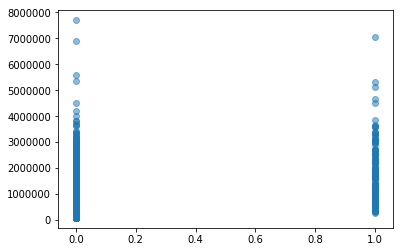

In [17]:
x = df['waterfront']
y = df['price']

plt.scatter(x,y, alpha=0.5)
plt.show()

In [18]:
df2 = df[df.waterfront==df.waterfront] # Looking at everything that equals null value in waterfront
df2.shape

(19221, 20)

In [19]:
# I can now look at the count and see there are 146 waterfront houses
print(df2[df2.waterfront==0].shape, df2[df2.waterfront==1].shape)

(19075, 20) (146, 20)


In [20]:
df2[df2.waterfront==0].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.907500e+04,19074.000000,19075.000000,19075.000000,1.907500e+04,19075.000000,19075.0,19019.000000,19075.000000,19075.000000,19075.000000,19075.000000,15688.000000,19075.000000,19075.000000,19075.000000,19075.000000,19075.000000
mean,5.326420e+05,3.373283,2.112543,2073.524404,1.499112e+04,1.493997,0.0,0.203954,3.408965,7.652058,1785.875125,1971.106841,79.280087,98077.591140,47.560078,-122.213552,1982.052949,12729.486186
std,3.449592e+05,0.902010,0.764537,909.083746,4.077700e+04,0.539980,0.0,0.698385,0.649431,1.165675,824.965911,29.391929,389.881401,53.373727,0.138857,0.140740,680.982492,27593.553043
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.0,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.200000e+05,3.000000,1.750000,1420.000000,5.036500e+03,1.000000,0.0,0.000000,3.000000,7.000000,1190.000000,1952.000000,0.000000,98032.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.589000e+03,1.500000,0.0,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.572200,-122.230000,1840.000000,7600.000000
75%,6.386000e+05,4.000000,2.500000,2540.000000,1.058400e+04,2.000000,0.0,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2350.000000,10031.500000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,0.0,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [21]:
df2[df2.waterfront==1].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.460000e+02,146.000000,146.000000,146.000000,146.000000,146.000000,146.0,145.000000,146.000000,146.000000,146.000000,146.000000,121.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,1.717215e+06,3.349315,2.708904,3244.753425,25870.883562,1.630137,1.0,3.786207,3.541096,8.835616,2508.760274,1962.280822,476.628099,98096.712329,47.539677,-122.278164,2682.828767,22893.698630
std,1.145385e+06,1.099169,1.121509,1652.134956,44629.075899,0.547895,0.0,0.555105,0.743957,1.781233,1283.720489,27.118576,852.484732,60.599756,0.113744,0.123772,808.410448,23264.085993
min,2.850000e+05,1.000000,0.750000,440.000000,1989.000000,1.000000,1.0,1.000000,1.000000,5.000000,440.000000,1905.000000,0.000000,98004.000000,47.327600,-122.514000,750.000000,3230.000000
25%,8.275000e+05,3.000000,1.812500,2082.500000,11692.250000,1.000000,1.0,4.000000,3.000000,8.000000,1565.000000,1941.250000,0.000000,98040.000000,47.452550,-122.376000,2075.000000,11991.500000
50%,1.510000e+06,3.000000,2.500000,2900.000000,17730.500000,2.000000,1.0,4.000000,3.000000,9.000000,2200.000000,1959.500000,0.000000,98075.000000,47.548150,-122.273500,2695.000000,16260.500000
75%,2.282500e+06,4.000000,3.250000,4117.500000,26692.500000,2.000000,1.0,4.000000,4.000000,10.000000,3220.000000,1984.750000,0.000000,98155.000000,47.607550,-122.210000,3140.000000,24537.500000
max,7.060000e+06,6.000000,6.750000,10040.000000,505166.000000,3.000000,1.0,4.000000,5.000000,12.000000,7680.000000,2014.000000,2009.000000,98199.000000,47.772900,-122.059000,4913.000000,192268.000000


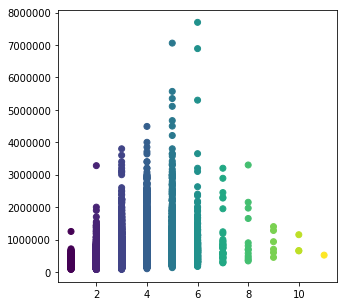

In [22]:
plt.figure(figsize=(5, 5))
plt.scatter(df.bedrooms, df.price, c=df.bedrooms.values);
plt.show()

Number of bedrooms are related to price but relationship is not clear based on the data given

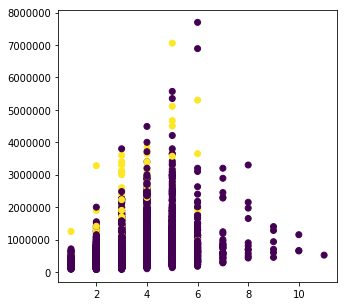

In [23]:
plt.figure(figsize=(5, 5))
plt.scatter(df.bedrooms, df.price, c=df.waterfront.values);
plt.show()

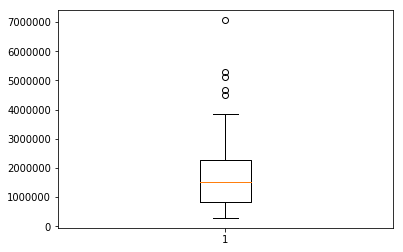

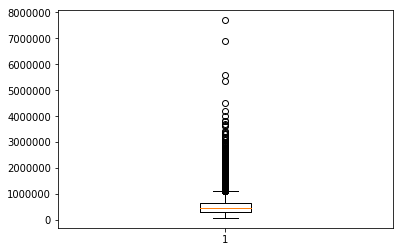

In [24]:
plt.boxplot(df2[df2.waterfront==1]['price']);
plt.show()
plt.boxplot(df2[df2.waterfront==0]['price']);
plt.show()

In [25]:
# Both boxplots show the outliers in waterfront vs non-waterfront houses
# Non-waterfront houses show many homes that fall outside of the mean

In analyzing the missing data, I'll consider any value greater than 20% missing.  Thus it would be best to delete that value or possibly fill the value in with the average value.  According to the dataset, year renovated (yr_renovated) is 17%.  I think its best to keep this category as I don't belive it will affect the dataset.   

## Exploring the dataset with visualizations

In [26]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

The dataset shows the minimun price for Kings County homes are $78,000.  The maximun price for Kings County home is $7,700,000.  The average (or mean) price of a Kings County home is $540,296.60

C:\Users\lasha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


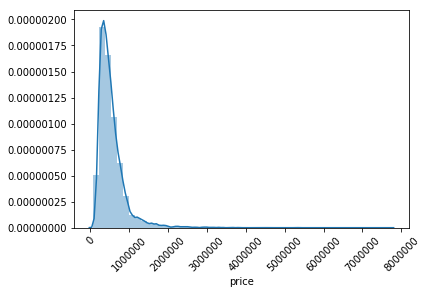

In [27]:
#histogram of price
sns.distplot(df['price']);
plt.xticks(rotation=45);

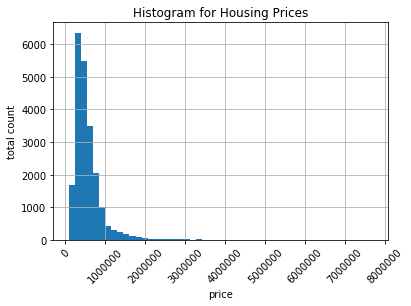

In [28]:
plt.xlabel('price')
plt.ylabel('total count')
plt.title('Histogram for Housing Prices')
df.price.hist(bins=50)
plt.xticks(rotation=45);

In [29]:
#skewness and kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 4.023365
Kurtosis: 34.541359


Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

In [30]:
from numpy.random import normal
import numpy as np
from scipy.stats import norm

In [31]:
norm.fit(df.price)

(540296.5735055795, 367359.634929548)

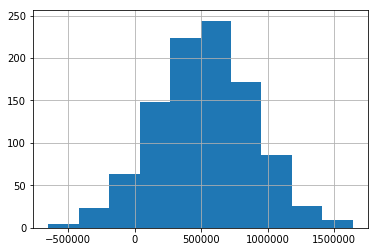

In [32]:
μ = 540296.574
σ = 367359.635
pd.Series(normal(loc=μ, scale=σ, size=1000)).hist();

C:\Users\lasha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


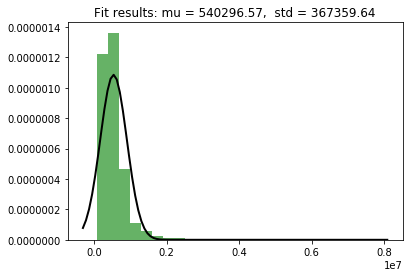

In [33]:
# Plot the histogram.
plt.hist(df.price, bins=25, normed=True, alpha=0.6, color='g')

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, μ, σ)
plt.plot(x, p, 'k', linewidth=2);
title = "Fit results: mu = {:.2f},  std = {:.2f}".format(μ, σ)
plt.title(title);

Both plots show the following:

* There is a devation from the normal distribution
* Both plots have appreciable positive skewness
* Both plots show peakedness

C:\Users\lasha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


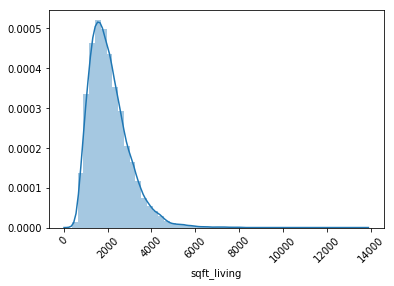

In [34]:
#histogram of square feet
sns.distplot(df['sqft_living']);
plt.xticks(rotation=45);

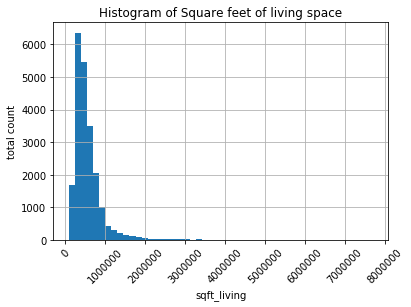

In [35]:
plt.xlabel('sqft_living')
plt.ylabel('total count')
plt.title('Histogram of Square feet of living space')
df.price.hist(bins=50)
plt.xticks(rotation=45);

In [36]:
#skewness and kurtosis
print("Skewness: %f" % df['sqft_living'].skew())
print("Kurtosis: %f" % df['sqft_living'].kurt())

Skewness: 1.473215
Kurtosis: 5.252102


In [37]:
norm.fit(df.sqft_living)

(2080.3218502569803, 918.0848694252896)

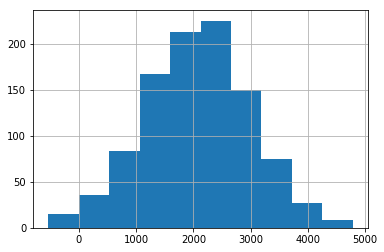

In [38]:
μ = 2080.322
σ = 918.085
pd.Series(normal(loc=μ, scale=σ, size=1000)).hist();

### Markdown cell here


## Heat Map

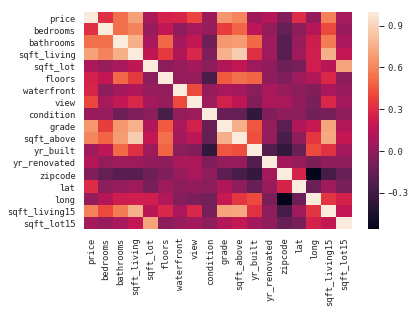

<Figure size 1080x576 with 0 Axes>

In [39]:
sns.set(context="paper", font="monospace")
sns.heatmap(df.corr())
sns.set(font_scale=1.25)
plt.figure(figsize=(15, 8))
plt.show();

In [40]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.315961,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,-0.002303,0.080922,0.023440,0.366174,0.492543,0.160736,0.019429,-0.158588,-0.011595,0.136561,0.404532,0.031892
bathrooms,0.525906,0.527870,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.701917,0.593178,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.089876,0.033602,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.256804,0.183707,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,0.276295,-0.002303,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.395734,0.080922,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,0.036056,0.023440,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126
grade,0.667951,0.366174,0.665838,0.762779,0.114731,0.458794,0.087383,0.249727,-0.146896,1.000000,0.756073,0.447865,0.016669,-0.185771,0.113575,0.200341,0.713867,0.120981


The independent values strongly correlated to Price are below.  I choose these values because they are greater than 0.50:
* Bathrooms
* Sqft_living
* Sqft_above
* Grade
* Yr_built
* Sqft_living15

## Linear Regression

In [41]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

### X and Y arrays

In [42]:
X = df[['bathrooms', 'sqft_living', 'sqft_lot','grade', 'sqft_above','yr_built','sqft_living15']]
y = df['price']

### Train Test Split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

### Creating the Training Model

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lm = LinearRegression()

In [47]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Model Evalation
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [48]:
# print the intercept
print(lm.intercept_)

6848684.154608115


In [49]:
lm.coef_

array([ 4.46292671e+04,  1.48915484e+02, -1.91759870e-01,  1.39634531e+05,
       -1.51815488e+01, -3.96929086e+03,  3.61981894e+01])

In [50]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bathrooms,44629.267142
sqft_living,148.915484
sqft_lot,-0.191760
grade,139634.530992
sqft_above,-15.181549
yr_built,-3969.290860
sqft_living15,36.198189


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Bathrooms** is associated with an **increase of \$45,685.02 **.
- Holding all other features fixed, a 1 unit increase in **Sqft_living** is associated with an **increase of \$147.66 **.
- Holding all other features fixed, a 1 unit increase in **Sqft_above** is associated with an **decrease of \$16.58 **.
- Holding all other features fixed, a 1 unit increase in **Grade** is associated with an **increase of \$140,108.28 **.
- Holding all other features fixed, a 1 unit increase in **Yr_built** is associated with an **decrease of \$3,973.29 **.
- Holding all other features fixed, a 1 unit increase in **Sqft_living15** is associated with an **increase of \$35.85 **.

### Predictions from our Model
Grabbing predictions off of test set and see how well it fits!

In [51]:
predictions = lm.predict(X_test)

Text(0,0.5,'Price')

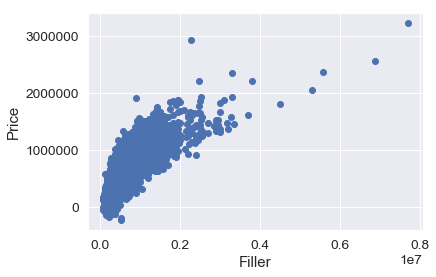

In [52]:
plt.scatter(y_test,predictions) 
plt.xlabel('Filler')
plt.ylabel('Price')
#No good??

C:\Users\lasha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


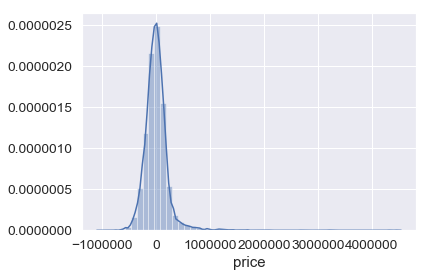

In [53]:
#Residual Historgram
sns.distplot((y_test-predictions),bins=50);

In [54]:
from sklearn import metrics

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 145596.9226906638
MSE: 51561630812.046486
RMSE: 227071.8626603624


## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

* Obtained from Udemy.com Python for data science and machine learning course, Linear regression lecture (section 15, lecture 82).  Url https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/learn/v4/t/lecture/5733428?start=0

In [56]:
import statsmodels.api as sms

In [57]:
X = df.bathrooms
X = sms.add_constant(X)
y = df.price

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     8256.
Date:                Tue, 22 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:24:09   Log-Likelihood:            -3.0389e+05
No. Observations:               21597   AIC:                         6.078e+05
Df Residuals:                   21595   BIC:                         6.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8712.6518   6224.769      1.400      0.162   -3488.356    2.09e+04
bathrooms   2.512e+05   2765.054     90.863      0.000    2.46e+05    2.57e+05
==============================================================================
Omnibus:                    17251.570   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           882735.889
Skew:                           3.452   Prob(JB):                         0.00
Kurtosis:                      33.550   Cond. No.                         7.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

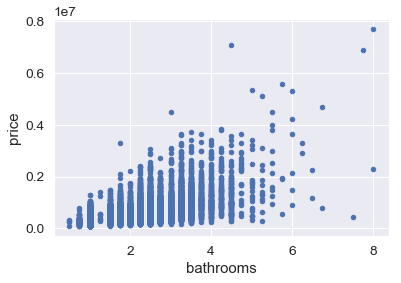

In [58]:
df.plot(x='bathrooms',   
           y='price',
           kind='scatter');

In [59]:
X = df.sqft_living
X = sms.add_constant(X)
y = df.price

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 22 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:24:09   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

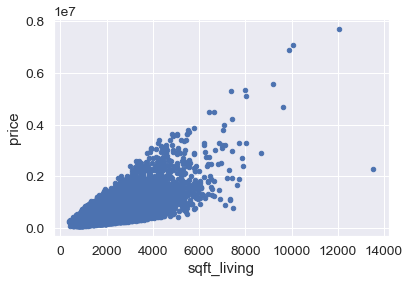

In [60]:
df.plot(x='sqft_living',   
           y='price',
           kind='scatter');

In [61]:
X = df.grade
X = sms.add_constant(X)
y = df.price

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Tue, 22 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:24:10   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.061e+06   1.23e+04    -86.396      0.000   -1.09e+06   -1.04e+06
grade       2.092e+05   1585.790    131.895      0.000    2.06e+05    2.12e+05
==============================================================================
Omnibus:                    19879.964   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043898.709
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.954   Cond. No.                         52.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

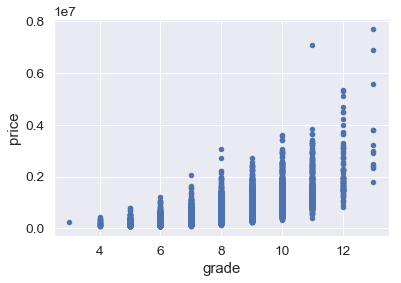

In [62]:
df.plot(x='grade',   
           y='price',
           kind='scatter');

In [63]:
X = df.sqft_lot
X = sms.add_constant(X)
y = df.price

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     175.9
Date:                Tue, 22 Jan 2019   Prob (F-statistic):           5.57e-40
Time:                        21:24:10   Log-Likelihood:            -3.0730e+05
No. Observations:               21597   AIC:                         6.146e+05
Df Residuals:                   21595   BIC:                         6.146e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.283e+05   2650.075    199.337      0.000    5.23e+05    5.33e+05
sqft_lot       0.7973      0.060     13.261      0.000       0.679       0.915
==============================================================================
Omnibus:                    19136.153   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1147708.008
Skew:                           4.030   Prob(JB):                         0.00
Kurtosis:                      37.792   Cond. No.                     4.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

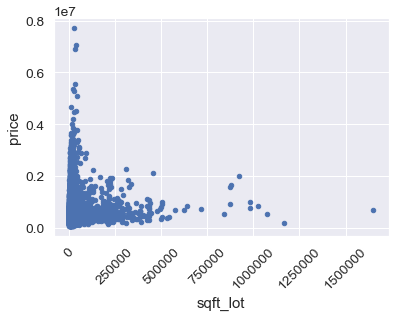

In [64]:
df.plot(x='sqft_lot',   
           y='price',
           kind='scatter');
plt.xticks(rotation=45);

In [65]:
X = df.sqft_above
X = sms.add_constant(X)
y = df.price

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.249e+04
Date:                Tue, 22 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:24:10   Log-Likelihood:            -3.0246e+05
No. Observations:               21597   AIC:                         6.049e+05
Df Residuals:                   21595   BIC:                         6.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.976e+04   4737.581     12.613      0.000    5.05e+04     6.9e+04
sqft_above   268.6684      2.404    111.767      0.000     263.957     273.380
==============================================================================
Omnibus:                    16492.245   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           728366.432
Skew:                           3.265   Prob(JB):                         0.00
Kurtosis:                      30.691   Cond. No.                     4.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

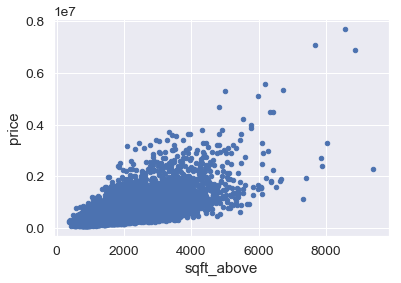

In [66]:
df.plot(x='sqft_above',   
           y='price',
           kind='scatter');

In [67]:
X = df.yr_built
X = sms.add_constant(X)
y = df.price

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     63.05
Date:                Tue, 22 Jan 2019   Prob (F-statistic):           2.12e-15
Time:                        21:24:11   Log-Likelihood:            -3.0736e+05
No. Observations:               21597   AIC:                         6.147e+05
Df Residuals:                   21595   BIC:                         6.147e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.896e+05   1.68e+05     -4.714      0.000   -1.12e+06   -4.61e+05
yr_built     674.7431     84.979      7.940      0.000     508.178     841.308
==============================================================================
Omnibus:                    19135.901   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1142512.023
Skew:                           4.031   Prob(JB):                         0.00
Kurtosis:                      37.708   Cond. No.                     1.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

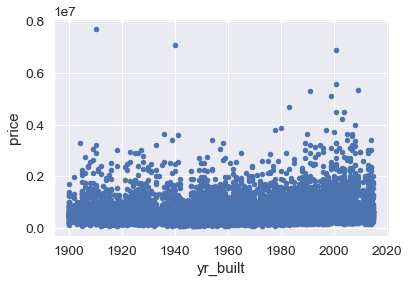

In [68]:
df.plot(x='yr_built',   
           y='price',
           kind='scatter');

In [69]:
X = df.sqft_living15
X = sms.add_constant(X)
y = df.price

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                 1.125e+04
Date:                Tue, 22 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:24:11   Log-Likelihood:            -3.0286e+05
No. Observations:               21597   AIC:                         6.057e+05
Df Residuals:                   21595   BIC:                         6.057e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.303e+04   6216.659    -13.356      0.000   -9.52e+04   -7.08e+04
sqft_living15   313.7615      2.958    106.064      0.000     307.963     319.560
==============================================================================
Omnibus:                    20143.282   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1910578.895
Skew:                           4.207   Prob(JB):                         0.00
Kurtosis:                      48.303   Cond. No.                     6.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

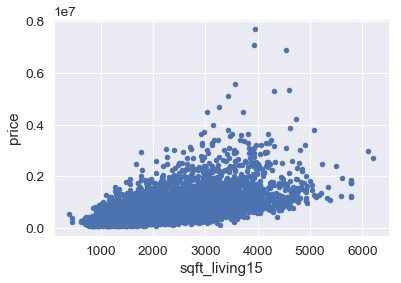

In [70]:
df.plot(x='sqft_living15',   
           y='price',
           kind='scatter');

## Multiple Regression

In [71]:
import statsmodels.formula.api as smf

In [72]:
#GrLivArea: Above grade (ground) living area square feet
model = 'price ~ bathrooms + sqft_living + sqft_lot + grade +sqft_above +yr_built +sqft_living15'
smf.ols(formula=model, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     4790.
Date:                Tue, 22 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:24:12   Log-Likelihood:            -2.9727e+05
No. Observations:               21597   AIC:                         5.946e+05
Df Residuals:                   21589   BIC:                         5.946e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.852e+06   1.28e+05     53.694      0.000     6.6e+06     7.1e+06
bathrooms      4.531e+04   3485.500     13.001      0.000    3.85e+04    5.21e+04
sqft_living     154.5161      4.486     34.447      0.000     145.724     163.308
sqft_lot         -0.1873      0.039     -4.854      0.000      -0.263      -0.112
grade          1.378e+05   2335.867     58.987      0.000    1.33e+05    1.42e+05
sqft_above      -14.9418      4.285     -3.487      0.000     -23.341      -6.542
yr_built      -3964.5156     67.117    -59.069      0.000   -4096.070   -3832.961
sqft_living15    30.0958      3.742      8.043      0.000      22.762      37.430
==============================================================================
Omnibus:                    18066.762   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1463961.427
Skew:                           3.548   Prob(JB):                         0.00
Kurtosis:                      42.705   Cond. No.                     3.60e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

'bathrooms', 'sqft_living', 'sqft_lot','grade', 'sqft_above','yr_built','sqft_living15'